## Association Rule Mining 
Association rule mining is a technique to identify underlying relations between different items. Take an example of a Super Market where customers can buy variety of items. Usually, there is a pattern in what the customers buy. For instance, mothers with babies buy baby products such as milk and diapers.

For instance, if item A and B are bought together more frequently then several steps can be taken to increase the profit. For example:

1. A and B can be placed together so that when a customer buys one of the product he doesn't have to go far away to buy the other product.
1. People who buy one of the products can be targeted through an advertisement campaign to buy the other.
1. Collective discounts can be offered on these products if the customer buys both of them.
1. Both A and B can be packaged together.
The process of identifying an associations between products is called association rule mining.

The most prominent practical application of the algorithm is to recommend products based on the products already present in the user’s cart. Walmart especially has made great use of the algorithm in suggesting products to it’s users.

### Apriori Algorithm for Association Rule Mining

Different statistical algorithms have been developed to implement association rule mining, and Apriori is one such algorithm. 

Apriori algorithm considers 3 important factors which are, support, confidence and lift. Each of these factors is explained as follows:

1. Support:
The support of item I is defined as the ratio between the number of transactions containing the item I by the total number of transactions expressed as :
$Support(I) = \frac{\text{number of  transactions containing I}}{\text{Total number of transactions}}$
1. Confidence:
Confidence refers to the likelihood that an item B is also bought if item A is bought. It can be calculated by finding the number of transactions where A and B are bought together, divided by total number of transactions where A is bought.
$Confidence(A→B) = \frac{\text{number of transactions containing both (A and B)}}{\text{number of transactions containing A}}$
1. Lift:
Lift(A -> B) refers to the increase in the ratio of sale of B when A is sold. 
$Lift(A→B) = \frac{\text{Confidence (A→B)}}{\text{Support (B)}}$



### 1. Installation
[Mlxtend](http://rasbt.github.io/mlxtend/) (machine learning extensions) is a Python library of useful tools for the day-to-day data science tasks. 

In [1]:
pip install mlxtend --upgrade

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth, association_rules

### Importing the Dataset
Now let's import the dataset and see what we're working with.

* Dataset : [Groceries data](http://archive.ics.uci.edu/ml/machine-learning-databases/00352/) 

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Loading the Data
data = pd.read_excel('Online Retail.xlsx')
data.shape

(541909, 8)

In [5]:
# Exploring the columns of the data
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
# Exploring the different regions of transactions
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [7]:
data.groupby('Country').count()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
Country,,,,,,,
Australia,1259,1259,1259,1259,1259,1259,1259
Austria,401,401,401,401,401,401,401
Bahrain,19,19,19,19,19,19,17
Belgium,2069,2069,2069,2069,2069,2069,2069
Brazil,32,32,32,32,32,32,32
Canada,151,151,151,151,151,151,151
Channel Islands,758,758,758,758,758,758,758
Cyprus,622,622,622,622,622,622,622
Czech Republic,30,30,30,30,30,30,30


### Data Proprocessing

1. We will drop the rows without any invoice number
1. We will drop all transactions which were done on credit
1. Splitting the data according to the region of transaction 
1. Dropping all transactions which the frequency is less than 4


In [8]:
# Stripping extra spaces in the description
data['Description'] = data['Description'].str.strip()
 
# Dropping the rows without any invoice number
data.dropna(axis = 0, subset =['InvoiceNo'], inplace = True)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
 
# Dropping all transactions which were done on credit
data = data[~data['InvoiceNo'].str.contains('C')]

In [9]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,532621.000000,532621.000000,397924.000000
mean,10.239972,3.847621,15294.315171
std,159.593551,41.758023,1713.169877
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [10]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
min_freq = 3

In [12]:
# Dropping all transactions which the frequency is less than 4
count_item = data.groupby('Description').count().sort_values('InvoiceNo', ascending=False)
count_item = count_item[count_item['InvoiceNo']>min_freq]
print(count_item)

data = data[data['Description'].isin(list(count_item.index))]

                                    InvoiceNo  StockCode  Quantity  \
Description                                                          
WHITE HANGING HEART T-LIGHT HOLDER       2327       2327      2327   
JUMBO BAG RED RETROSPOT                  2115       2115      2115   
REGENCY CAKESTAND 3 TIER                 2019       2019      2019   
PARTY BUNTING                            1707       1707      1707   
LUNCH BAG RED RETROSPOT                  1594       1594      1594   
...                                       ...        ...       ...   
DIAMANTE NECKLACE PURPLE                    4          4         4   
HOME SWEEET HOME 3 PEG HANGER               4          4         4   
SET 10 CARD PERFECT NATIVITY 17089          4          4         4   
BLACK GEMSTONE BRACELET                     4          4         4   
SET 10 CARD SNOWMAN 16965                   4          4         4   

                                    InvoiceDate  UnitPrice  CustomerID  \
Description    

In [13]:
# Transactions done in USA
basket_USA = (data[data['Country'] =="USA"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
 
# Transactions done in Canada
basket_CAN = (data[data['Country'] =="Canada"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Transactions done in France
basket_France = (data[data['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Transactions done in United Kingdom
basket_UK = (data[data['Country'] =="United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [14]:
basket_UK.shape

(18460, 3621)

In [15]:
# Defining the hot encoding function to make the data suitable for the concerned libraries
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1
 
# Encoding the datasets
basket_encoded = basket_USA.applymap(hot_encode)
basket_USA = basket_encoded
 
basket_encoded = basket_CAN.applymap(hot_encode)
basket_CAN = basket_encoded
 
basket_encoded = basket_France.applymap(hot_encode)
basket_France = basket_encoded

basket_encoded = basket_UK.applymap(hot_encode)
basket_UK = basket_encoded

### Apply Apriori Algorithm
For large sets of data, there can be hundreds of items in hundreds of thousands transactions. The Apriori algorithm tries to extract rules for each possible combination of items.

This process can be extremely slow due to the number of combinations. To speed up the process, we need to perform the following steps:

1. Set a minimum value for support and confidence. This means that we are only interested in finding rules for the items that have certain default existence (e.g. support) and have a minimum value for co-occurrence with other items (e.g. confidence).
1. Extract all the subsets having higher value of support than minimum threshold.
1. Select all the rules from the subsets with confidence value higher than minimum threshold.
1. Order the rules by descending order of Lift.

In [16]:
min_sup = 0.05
min_conf = 0.5

In [17]:
# Now, let us return the items and itemsets with at least 5% support:
# Building the aprior model
frq_items = apriori(basket_France, min_support = min_sup, use_colnames = True)
print(frq_items.head())
print(frq_items.shape)

    support                       itemsets
0  0.071429  (4 TRADITIONAL SPINNING TOPS)
1  0.096939   (ALARM CLOCK BAKELIKE GREEN)
2  0.102041    (ALARM CLOCK BAKELIKE PINK)
3  0.094388     (ALARM CLOCK BAKELIKE RED)
4  0.068878   (ASSORTED COLOUR MINI CASES)
(195, 2)


In [18]:
# Building the FP growth model
frq_items1 = fpgrowth(basket_France, min_support=min_sup, use_colnames=True)
print(frq_items1.head())

    support                              itemsets
0  0.765306                             (POSTAGE)
1  0.181122       (RED TOADSTOOL LED NIGHT LIGHT)
2  0.158163  (ROUND SNACK BOXES SET OF4 WOODLAND)
3  0.125000                  (SPACEBOY LUNCH BOX)
4  0.104592              (MINI PAINT SET VINTAGE)


In [19]:
frq_items1.shape

(195, 2)

1. Selecting and Filtering Results

The advantage of working with pandas DataFrames is that we can use its convenient features to filter the results. 
For instance, let's assume we are only interested in itemsets of length 2 that have a support of at least 80 percent. First, we create the frequent itemsets via apriori and add a new column that stores the length of each itemset:


In [20]:
frq_items['length'] = frq_items['itemsets'].apply(lambda x: len(x))
print(frq_items.head())
frq_items1['length'] = frq_items1['itemsets'].apply(lambda x: len(x))
print(frq_items1.head())

    support                       itemsets  length
0  0.071429  (4 TRADITIONAL SPINNING TOPS)       1
1  0.096939   (ALARM CLOCK BAKELIKE GREEN)       1
2  0.102041    (ALARM CLOCK BAKELIKE PINK)       1
3  0.094388     (ALARM CLOCK BAKELIKE RED)       1
4  0.068878   (ASSORTED COLOUR MINI CASES)       1
    support                              itemsets  length
0  0.765306                             (POSTAGE)       1
1  0.181122       (RED TOADSTOOL LED NIGHT LIGHT)       1
2  0.158163  (ROUND SNACK BOXES SET OF4 WOODLAND)       1
3  0.125000                  (SPACEBOY LUNCH BOX)       1
4  0.104592              (MINI PAINT SET VINTAGE)       1


In [21]:
print(frq_items[ (frq_items['length'] == 2) & (frq_items['support'] >= min_sup) ])
print(frq_items1[ (frq_items1['length'] == 2) & (frq_items1['support'] >= min_sup) ])

      support                                           itemsets  length
77   0.056122             (POSTAGE, 4 TRADITIONAL SPINNING TOPS)       2
78   0.073980  (ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...       2
79   0.079082  (ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...       2
80   0.084184              (ALARM CLOCK BAKELIKE GREEN, POSTAGE)       2
81   0.073980  (ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...       2
..        ...                                                ...     ...
165  0.051020  (ROUND SNACK BOXES SET OF4 WOODLAND, RED RETRO...       2
166  0.063776  (ROUND SNACK BOXES SET OF4 WOODLAND, ROUND SNA...       2
167  0.102041  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...       2
168  0.102041  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...       2
169  0.122449  (SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...       2

[93 rows x 3 columns]
      support                                           itemsets  length
77   0.158163           (POS

The generate_rules takes dataframes of frequent itemsets as produced by the `apriori`, `fpgrowth`, or `fpmax` functions in mlxtend.association. To demonstrate the usage of the generate_rules method, we first create a pandas DataFrame of frequent itemsets as generated by the `apriori` function:

a) apriori model

In [22]:
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="confidence", min_threshold = min_conf)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

                                           antecedents  \
29                        (JUMBO BAG WOODLAND ANIMALS)   
146  (PLASTERS IN TIN CIRCUS PARADE, RED TOADSTOOL ...   
151  (PLASTERS IN TIN WOODLAND ANIMALS, RED TOADSTO...   
170  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   
171  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   

                         consequents  antecedent support  consequent support  \
29                         (POSTAGE)            0.076531            0.765306   
146                        (POSTAGE)            0.051020            0.765306   
151                        (POSTAGE)            0.053571            0.765306   
170  (SET/6 RED SPOTTY PAPER PLATES)            0.102041            0.127551   
171    (SET/6 RED SPOTTY PAPER CUPS)            0.102041            0.137755   

      support  confidence      lift  leverage  conviction  
29   0.076531       1.000  1.306667  0.017961         inf  
146  0.051020       1.000  1.306667  0.011974     

b) FP growth model

In [23]:
rules1 = association_rules(frq_items1, metric ="confidence", min_threshold = min_conf)
rules1 = rules1.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules1.head())

                                           antecedents  \
66   (PLASTERS IN TIN WOODLAND ANIMALS, RED TOADSTO...   
165  (PLASTERS IN TIN CIRCUS PARADE, RED TOADSTOOL ...   
198                       (JUMBO BAG WOODLAND ANIMALS)   
123  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   
124  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   

                         consequents  antecedent support  consequent support  \
66                         (POSTAGE)            0.053571            0.765306   
165                        (POSTAGE)            0.051020            0.765306   
198                        (POSTAGE)            0.076531            0.765306   
123  (SET/6 RED SPOTTY PAPER PLATES)            0.102041            0.127551   
124    (SET/6 RED SPOTTY PAPER CUPS)            0.102041            0.137755   

      support  confidence      lift  leverage  conviction  
66   0.053571       1.000  1.306667  0.012573         inf  
165  0.051020       1.000  1.306667  0.011974     

### Viewing the Results
Pandas DataFrames make it easy to filter the results further. Let's say we are ony interested in rules that satisfy the following criteria:

at least 2 antecedents
a confidence > 0.95
a lift score > 7
We could compute the antecedent length as follows:

In [24]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules[ (rules['antecedent_len'] >= 2) &
       (rules['confidence'] > 0.95) &
       (rules['lift'] > 7) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
170,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959,2
171,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796,2
196,"(SET/20 RED RETROSPOT PAPER NAPKINS, POSTAGE, ...",(SET/6 RED SPOTTY PAPER PLATES),0.084184,0.127551,0.081633,0.969697,7.602424,0.070895,28.790816,3
197,"(SET/20 RED RETROSPOT PAPER NAPKINS, POSTAGE, ...",(SET/6 RED SPOTTY PAPER CUPS),0.084184,0.137755,0.081633,0.969697,7.039282,0.070036,28.454082,3


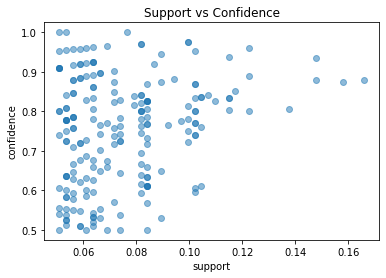

In [25]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

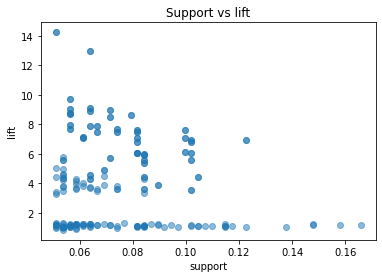

In [26]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs lift')
plt.show()

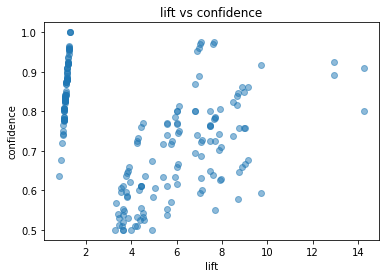

In [27]:
plt.scatter(rules['lift'], rules['confidence'], alpha=0.5)
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title('lift vs confidence')
plt.show()